In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv('/content/hello.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df['education'].value_counts()

,count
education,
1.0,1720
2.0,1253
3.0,687
4.0,473


<Axes: title={'center': 'Education vs TenYearCHD'}, xlabel='education'>

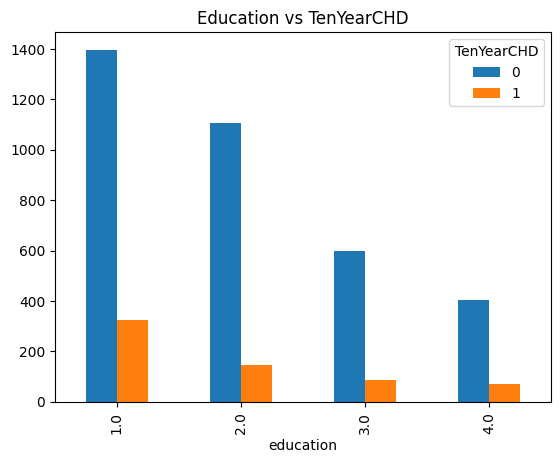

In [6]:
# Plot each crosstab in a different subplot
pd.crosstab(df['education'], df['TenYearCHD']).plot(kind='bar', title="Education vs TenYearCHD")

In [7]:
df.drop(labels=['education'],axis=1,inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.isna().sum().sort_values(ascending=False)

,0
glucose,388
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
age,0
currentSmoker,0
prevalentStroke,0


In [9]:
count_nulls=df.isna().sum(axis=1)
count_null_values=0
for i in count_nulls:
    if i>0:
        count_null_values+=1
print('Total number of rows with missing values is ', count_null_values)
print('since it is only',round((count_null_values/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

df.dropna(axis=0,inplace=True)

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [10]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: title={'center': 'Diabetes vs TenYearCHD'}, xlabel='diabetes'>

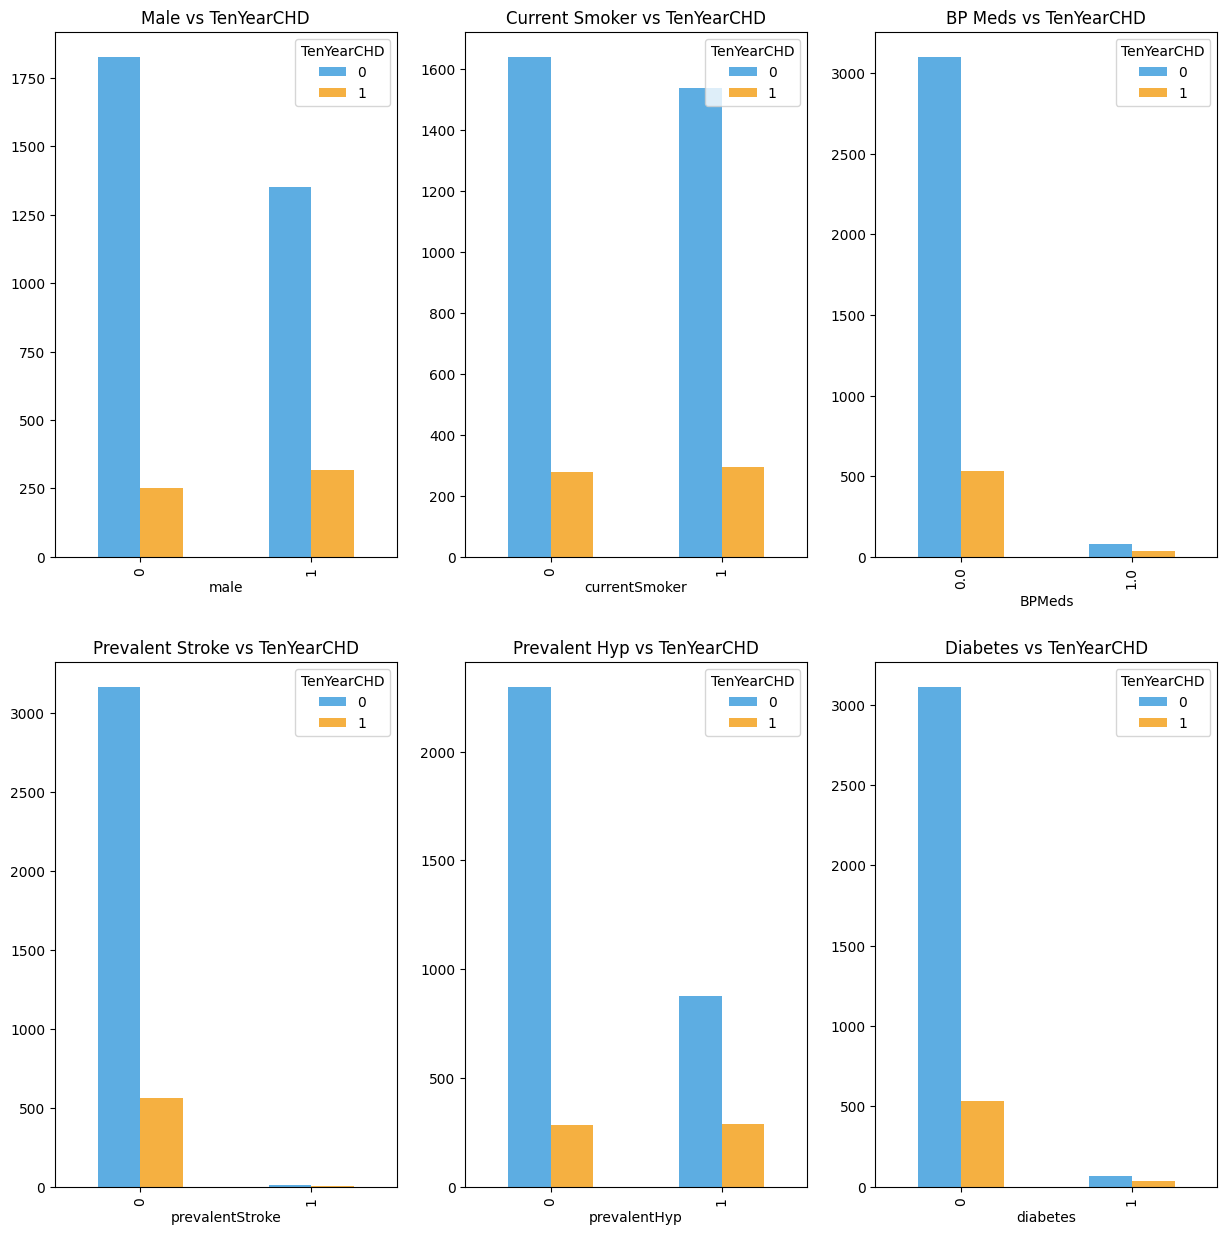

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Plot each crosstab in a different subplot
pd.crosstab(df['male'], df['TenYearCHD']).plot(kind='bar', ax=axes[0, 0], color=['#5DADE2', '#F5B041'], title="Male vs TenYearCHD")
pd.crosstab(df['currentSmoker'], df['TenYearCHD']).plot(kind='bar', ax=axes[0, 1], color=['#5DADE2', '#F5B041'], title="Current Smoker vs TenYearCHD")
pd.crosstab(df['BPMeds'], df['TenYearCHD']).plot(kind='bar', ax=axes[0, 2], color=['#5DADE2', '#F5B041'], title="BP Meds vs TenYearCHD")
pd.crosstab(df['prevalentStroke'], df['TenYearCHD']).plot(kind='bar', ax=axes[1, 0], color=['#5DADE2', '#F5B041'], title="Prevalent Stroke vs TenYearCHD")
pd.crosstab(df['prevalentHyp'], df['TenYearCHD']).plot(kind='bar', ax=axes[1, 1], color=['#5DADE2', '#F5B041'], title="Prevalent Hyp vs TenYearCHD")
pd.crosstab(df['diabetes'], df['TenYearCHD']).plot(kind='bar', ax=axes[1,2], color=['#5DADE2', '#F5B041'], title="Diabetes vs TenYearCHD")

In [12]:
df.groupby('TenYearCHD')[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].mean()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,
0,48.737488,8.72175,235.260623,130.306106,82.178313,25.664271,75.588920,80.625748
1,54.251748,10.58042,246.351399,143.806818,87.129371,26.617115,76.342657,88.867133


In [13]:
X=df.drop(['TenYearCHD'],axis=1)
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [14]:
y=df['TenYearCHD']
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4231,0
4232,1
4233,1
4234,0


In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
len(x_train)

2999

In [17]:
len(x_test)

750

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
predict_heart_disease_model=LogisticRegression()
predict_heart_disease_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [20]:
predict_heart_disease_model.score(x_test_scaled,y_test)

0.8586666666666667

In [21]:
y_predicted=predict_heart_disease_model.predict(x_test_scaled)
CM=confusion_matrix(y_test,y_predicted)
CM

array([[635,   3],
       [103,   9]])

Text(95.72222222222221, 0.5, 'truth')

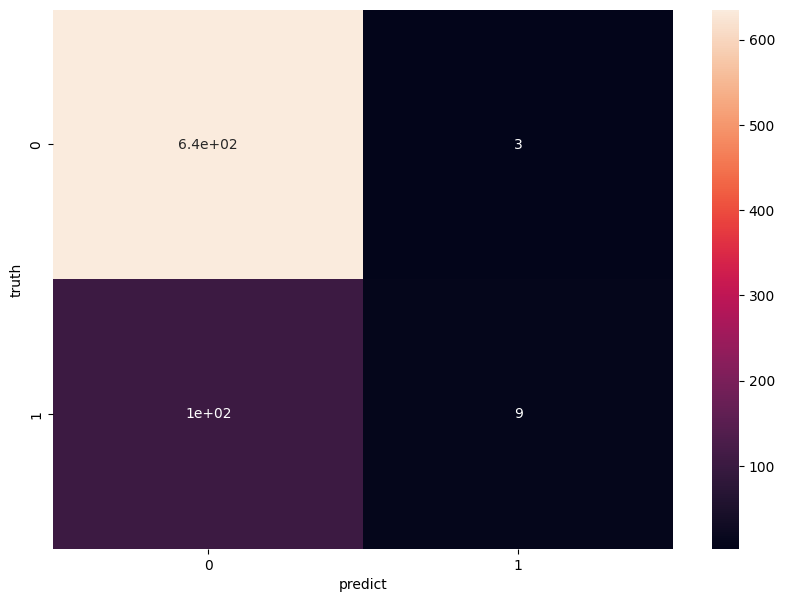

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(CM,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')